# DS TECHNIQUE DE VEILLE
This code is wrote by Ameny IHKAF and Mehdi SOMRANI

## Scrapping movies' data
## Importing needed libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.auto import tqdm

### Requesting and scrapping  data

In [ ]:
#Initialing
movies_index=1
movie_content_list = []
url = "https://www.imdb.com/search/title/?title_type=feature&genres=sci-fi&sort=num_votes,desc&count=250"
resp = requests.get(url)
movies_content = BeautifulSoup(resp.content, 'lxml')

with tqdm(total=812) as pbar:
    while len(movie_content_list) < 800 :
        movies_index = movies_index + 250
        #scrapping and organizing data into dictionnary
        for movie in movies_content.select('.lister-item-content'):

            #Decomposing the scrapped web page into key:value dictionary
            try:
                data = {
            "id": movie.find('a', href=True)['href'],
            "title":movie.select('.lister-item-header a')[0].get_text().strip(),
            "year":movie.select('.lister-item-year')[0].get_text().strip(),
            "genre":movie.select('.genre')[0].get_text().strip(),
            "certificate":movie.select('.certificate')[0].get_text().strip(),
            "time":movie.select('.runtime')[0].get_text().strip(),
            "ImdbRating":movie.select('.ratings-imdb-rating')[0].get_text().strip(),
            "metascore":movie.select('.ratings-metascore span')[0].get_text().strip(),
            "votes":movie.select('.sort-num_votes-visible span')[1].get_text().strip(),
            "simple_desc":movie.select('.text-muted')[2].get_text().strip(),
                }
                #Updating TQDM progress bar
                pbar.update(1)
            #Skip if the movie is missing any of the needed values
            except IndexError:
                continue

            #adding the dictionary to a list of dictionaries
            movie_content_list.append(data)

        #updating the url to next page and re-running the request and scrapping
        url = f"https://www.imdb.com/search/title/?title_type=feature&genres=sci-fi&sort=num_votes,desc&count=250&amp;start={movies_index}&amp;ref_=adv_nxt"
        resp = requests.get(url)
        movies_content = BeautifulSoup(resp.content, 'lxml')


### Converting to Dataframe and cleaning


In [ ]:
# Converting to Dataframe
movies_df = pd.DataFrame(movie_content_list)
movies_df

### Cleaning The Dataframe

In [ ]:
movies_df .dtypes

In [ ]:
#changing columns Types to string
movies_df  = movies_df .astype('string')

In [ ]:
#removing the uneeded characters from the id
movies_df['id'] = movies_df['id'].str[7:-1]

In [ ]:
#removing characters from the yeaer and converting it to integer
movies_df ['year'] = movies_df ['year'].str.extract('(\d+)').astype(int)

In [ ]:
#converting the rating to float
movies_df ['ImdbRating'] = movies_df ['ImdbRating'].astype(float)

In [ ]:
#removing the text from the votes and converting it to integer
movies_df ['votes'] = movies_df ['votes'].str.replace(',','').astype(int)

In [ ]:
#removing the text from the runtime and converting it to integer
movies_df ['time'] = movies_df ['time'].str[0:-3].astype(int)

In [ ]:
#checking if the types have changed
movies_df.dtypes

In [ ]:
#Printing the dataframe
movies_df

In [5]:
#Converting to csv
movies_df.to_csv("movies_df.csv")

,id,title,year,genre,certificate,time,ImdbRating,metascore,votes,simple_desc
0,tt1375666,Inception,2010,"Action, Adventure, Sci-Fi",PG-13,148,8.8,74,2336445,A thief who steals corporate secrets through t...
1,tt0133093,The Matrix,1999,"Action, Sci-Fi",R,136,8.7,73,1903262,When a beautiful stranger leads computer hacke...
2,tt0816692,Interstellar,2014,"Adventure, Drama, Sci-Fi",PG-13,169,8.6,74,1810240,A team of explorers travel through a wormhole ...
3,tt0848228,The Avengers,2012,"Action, Adventure, Sci-Fi",PG-13,143,8.0,69,1386515,Earth's mightiest heroes must come together an...
4,tt0076759,Star Wars,1977,"Action, Adventure, Fantasy",PG,121,8.6,90,1358944,Luke Skywalker joins forces with a Jedi Knight...
...,...,...,...,...,...,...,...,...,...,...
807,tt0816539,Jack Brooks: Monster Slayer,2007,"Action, Comedy, Horror",R,85,5.9,46,6452,A troubled young man still mourning the childh...
808,tt5737536,Future World,2018,"Action, Adventure, Sci-Fi",R,88,3.2,10,6410,A young boy searches a future world wasteland ...
809,tt0165874,The Mating Habits of the Earthbound Human,1999,"Comedy, Sci-Fi",R,88,6.3,26,6328,An anthropologist from an alien planet provide...
810,tt0055608,Voyage to the Bottom of the Sea,1961,"Action, Adventure, Sci-Fi",PG,105,6.0,49,6235,When the Earth is threatened by a burning Van ...


## Movies analysis and visualization
### Certificates visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
movies_df_vis = movies_df
movies_df_vis = movies_df_vis.groupby(['certificate']).count()
movies_df_vis = movies_df_vis['id']
movies_df_vis=movies_df_vis.reset_index()

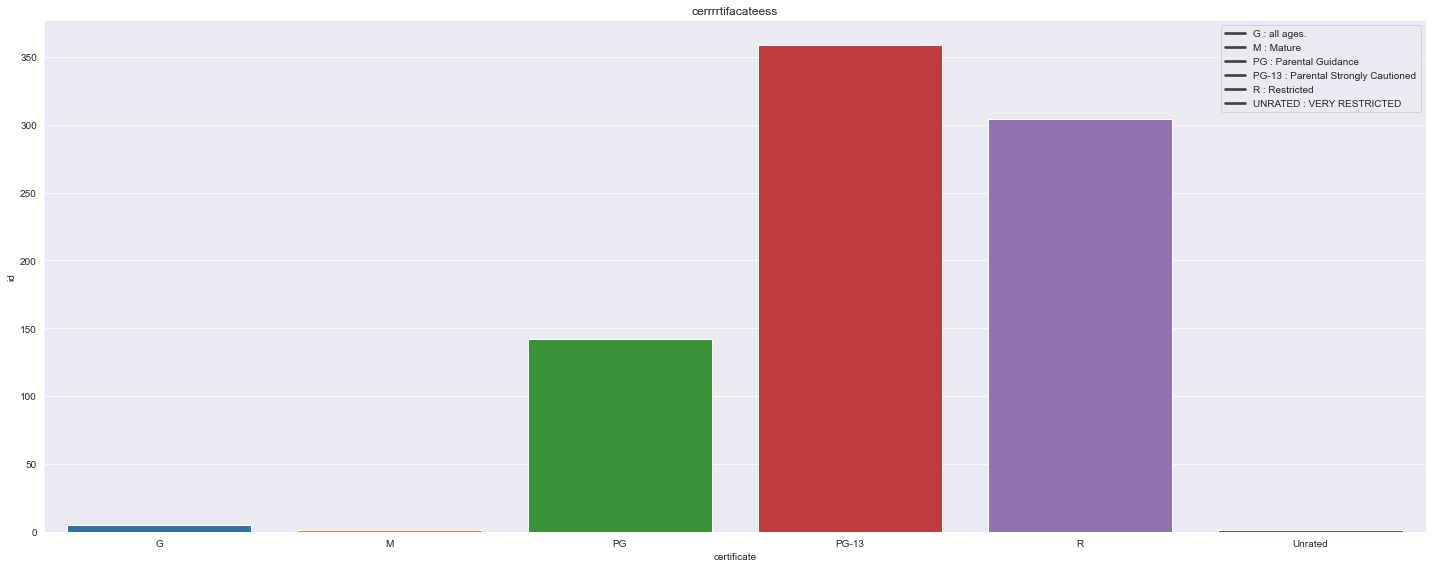

In [8]:
fig, axs = plt.subplots(1, figsize=(20, 8))
sns.barplot(data=movies_df_vis, x='certificate', y='id', ax=axs)
axs.set_title('Number of movies by Certificate')
plt.tight_layout()
plt.legend (labels=["G : all ages.","M : Mature","PG : Parental Guidance","PG-13 : Parental Strongly Cautioned","R : Restricted","UNRATED : VERY RESTRICTED"])

plt.show()

### Movies per year visualization

In [9]:
movies_df_vis = movies_df
movies_df_vis = movies_df_vis.groupby(['year']).count()
movies_df_vis = movies_df_vis['id']
movies_df_vis = movies_df_vis.reset_index()

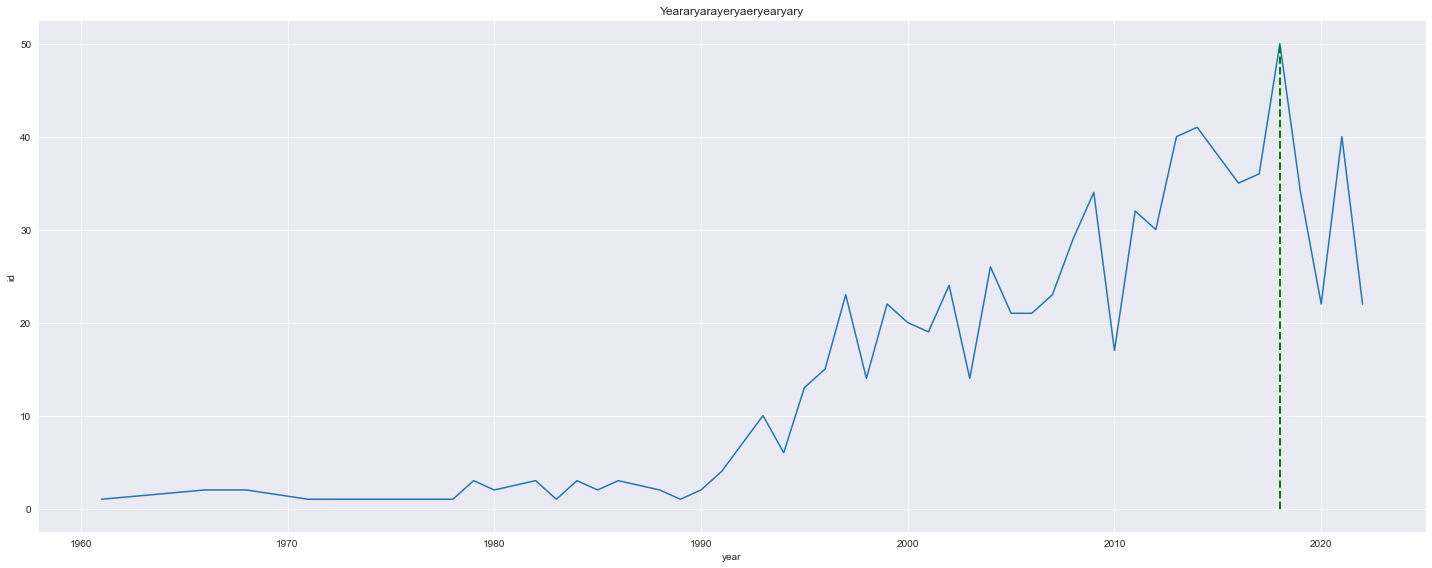

In [10]:
fig, axs = plt.subplots(1, figsize=(20, 8))
ax = sns.lineplot(data=movies_df_vis, x='year', y='id', ax=axs)
kdeline = ax.lines[0]
axs.set_title('Number of movies each year')
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
plt.tight_layout()
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='green', ls='--', lw=2)

plt.show()

## Requesting and scrapping reviews' data
### Importing needed libraries

In [11]:
from lxml import etree

### Scrapping Reviews function

In [12]:
def scrapping_movie_reviews(movie_id):
    df_review_content = []
    url =  f"https://www.imdb.com/title/{movie_id}/reviews?spoiler=hide&sort=totalVotes&dir=desc&ratingFilter=0"
    resp = requests.get(url)
    review_content = BeautifulSoup(resp.content, 'lxml')
    review_content_converted = etree.HTML(str(review_content))
    data_ajaxurl = review_content_converted.xpath('//*[@class="load-more-data"]/@data-ajaxurl')[0]
    with tqdm(total=613) as pbar:

        while True:
            resp = requests.get(url)
            #Converting the response to Beautiful Soup Object
            review_content = BeautifulSoup(resp.content, 'lxml')
            review_content_converted = etree.HTML(str(review_content))

            for review in review_content.select('.lister-item-content'):
                try:
                # Creating a python dictonary
                    data = {
                    "rating":review.select('.rating-other-user-rating span')[0].get_text().strip(),
                    "title": review.select('.title')[0].get_text().strip(),
                    "review": review.select('.show-more__control')[0].get_text().strip(),
                    }
                except IndexError:
                    continue
                #Updating TQDM progress bar
                pbar.update(1)
                df_review_content.append(data)
            try:
                pagination_key = review_content_converted.xpath('//*[@class="load-more-data"]/@data-key')[0]
                url = f"https://www.imdb.com{data_ajaxurl}&paginationKey={pagination_key}"
            except IndexError:
                break
    reviews = pd.DataFrame(df_review_content)
    reviews = reviews.reset_index()
    reviews['rating'] = reviews['rating'].astype(int)
    return reviews

## Creating reviews Dataframe for the top 5 sci-fi Movies

## Reviews sentiment analysis using ROBERTA
### Importing needed libraries

In [13]:
from transformers import AutoModelForSequenceClassification
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk

### Initializing needed variables

In [16]:
sia = SentimentIntensityAnalyzer()
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## Creating roberta score calculator function

In [15]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg' : scores[0],
        'neu' : scores[1],
        'pos' : scores[2]
    }
    return scores_dict

## Creating sentiment analysis to top 5 movies

In [17]:
movies = list(movies_df['id'].head(5))

### First Movie : INCEPTION

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

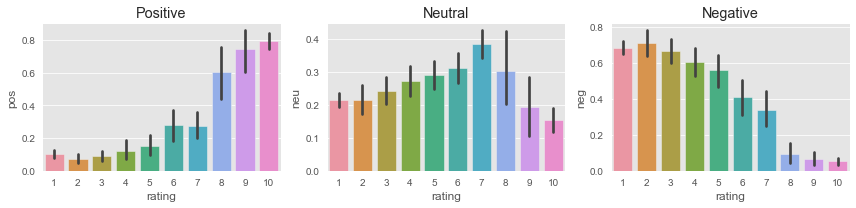

In [18]:
reviews = scrapping_movie_reviews(movies[0])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Inception = pd.DataFrame(res).T
Inception = Inception.reset_index()
Inception = Inception.merge(reviews, how='left')
Inception = Inception.sort_values('index')
Inception.to_csv('Inception.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Inception, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Inception, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Inception, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 2nd Movie : THE MATRIX

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

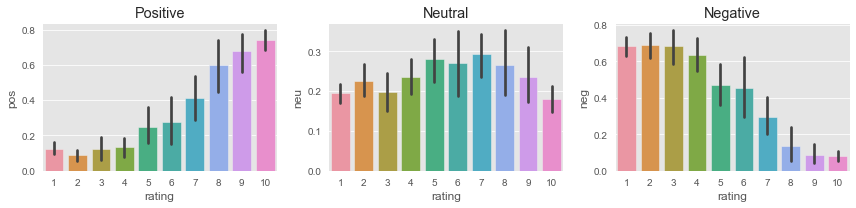

In [19]:
reviews = scrapping_movie_reviews(movies[1])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Matrix = pd.DataFrame(res).T
Matrix = Matrix.reset_index()
Matrix = Matrix.merge(reviews, how='left')
Matrix = Matrix.sort_values('index')
Matrix.to_csv('Matrix.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Matrix, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Matrix, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Matrix, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 3rd Movie : Interstellar

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

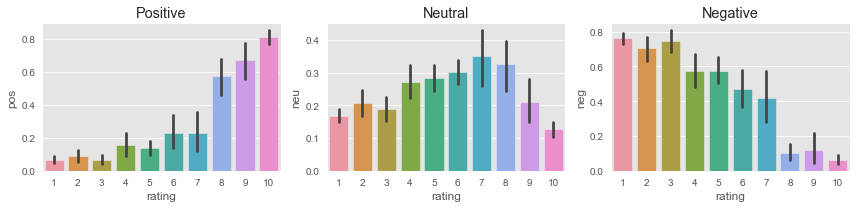

In [20]:
reviews = scrapping_movie_reviews(movies[2])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Interstellar = pd.DataFrame(res).T
Interstellar = Interstellar.reset_index()
Interstellar = Interstellar.merge(reviews, how='left')
Interstellar = Interstellar.sort_values('index')
Interstellar.to_csv("Interstellar.csv")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Interstellar, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Interstellar, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Interstellar, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 4th movie : The Avengers

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

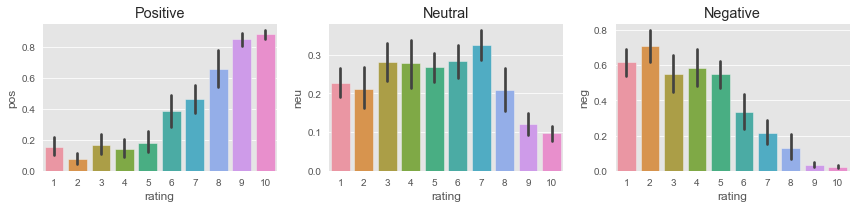

In [21]:
reviews = scrapping_movie_reviews(movies[3])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Avengers = pd.DataFrame(res).T
Avengers = Avengers.reset_index()
Avengers = Avengers.merge(reviews, how='left')
Avengers = Avengers.sort_values('index')
Avengers.to_csv('Avengers.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Avengers, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Avengers, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Avengers, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 5th movie : Star Wars

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

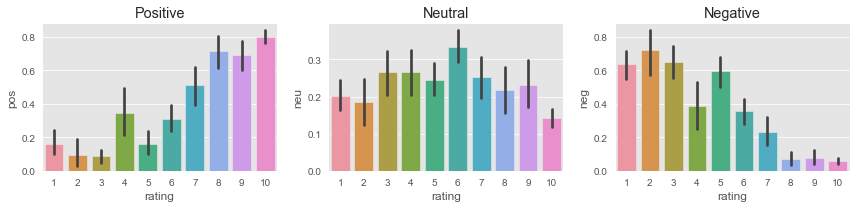

In [22]:
reviews = scrapping_movie_reviews(movies[4])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Star_Wars = pd.DataFrame(res).T
Star_Wars = Star_Wars.reset_index()
Star_Wars = Star_Wars.merge(reviews, how='left')
Star_Wars = Star_Wars.sort_values('index')
Star_Wars.to_csv('Star_Wars.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Star_Wars, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Star_Wars, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Star_Wars, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()